In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Importing the dataset

In [38]:
df = pd.read_csv('Credit Card Defaulters.csv')

In [40]:
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


cheking the data by running some basic commands

In [42]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [43]:
df.tail()

,default,student,balance,income
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365
9999,No,Yes,200.922183,16862.952321


In [44]:
df.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

In [45]:
df.corr()

,balance,income
balance,1.000000,-0.152243
income,-0.152243,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [47]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [48]:
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [49]:
df.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

Using visualization method to compare the datasets

<AxesSubplot:>

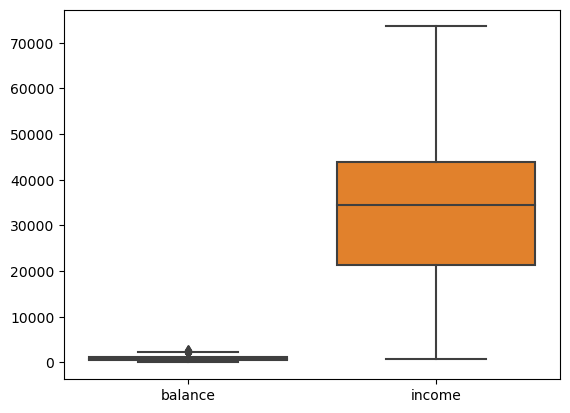

In [51]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='default', ylabel='count'>

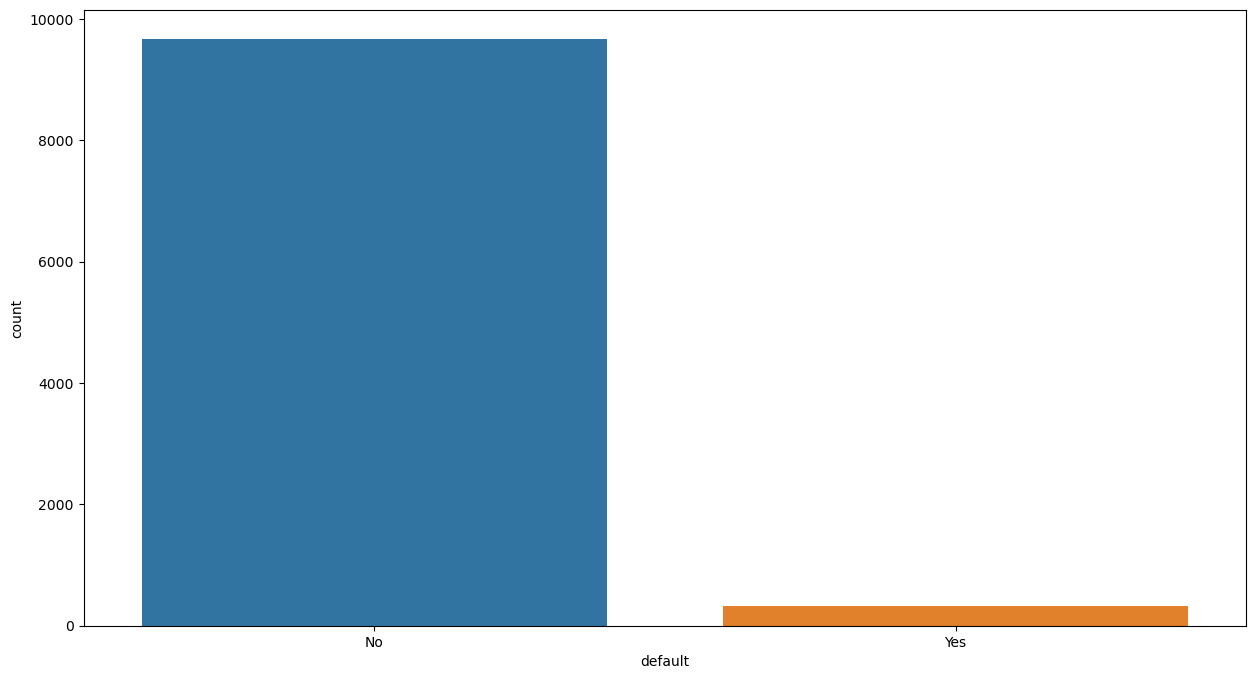

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(x='default',data=df)

<AxesSubplot:xlabel='student', ylabel='count'>

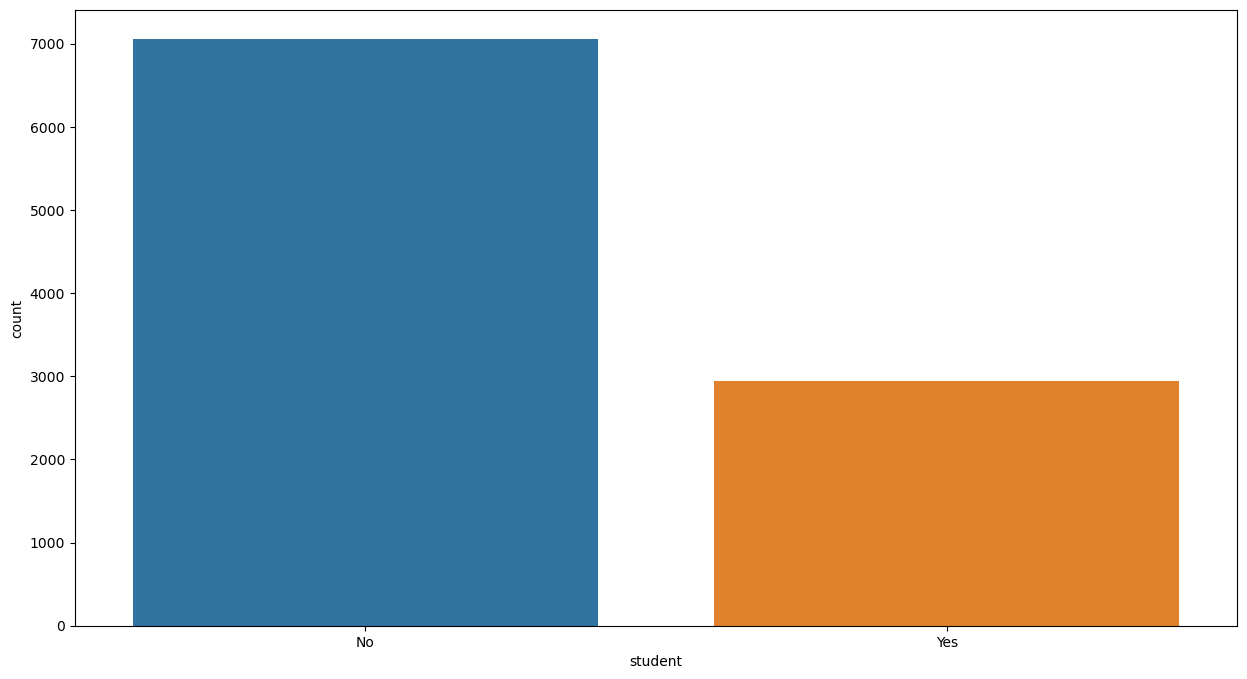

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(x='student',data=df)

<AxesSubplot:xlabel='student', ylabel='income'>

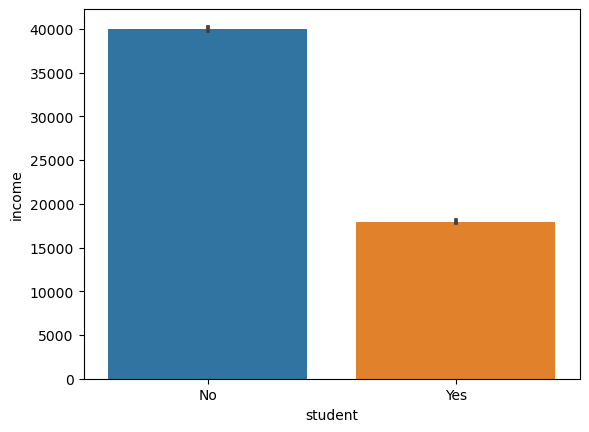

In [54]:
sns.barplot(data=df,x='student',y ='income')

<AxesSubplot:xlabel='default', ylabel='income'>

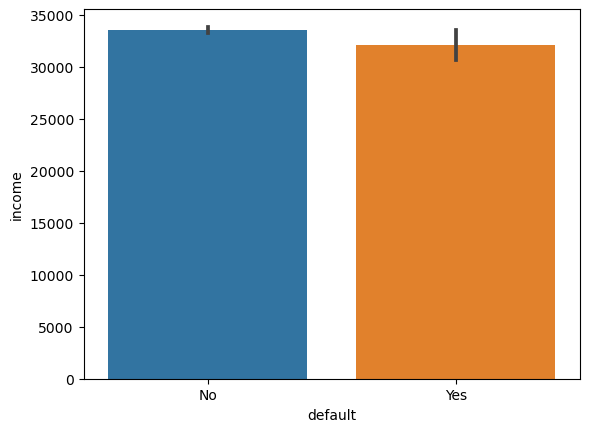

In [55]:
sns.barplot(data=df,x='default',y ='income')

Run Clustering Model

In [56]:
import sklearn.cluster as cluster

In [57]:
kmeans = cluster.KMeans(n_clusters=3,init='k-means++')

In [58]:
kmeans = kmeans.fit(df[['balance','income']])

In [59]:
kmeans.cluster_centers_

array([[  776.16382515, 36013.66424779],
       [  942.20509004, 18764.62117877],
       [  771.61582531, 50020.95797111]])

In [60]:
df['CLUSTERS'] = kmeans.labels_

In [61]:
df

,default,student,balance,income,CLUSTERS
0,No,No,729.526495,44361.625074,2
1,No,Yes,817.180407,12106.134700,1
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0
...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,2
9996,No,No,757.962918,19660.721768,1
9997,No,No,845.411989,58636.156984,2
9998,No,No,1569.009053,36669.112365,0


<AxesSubplot:xlabel='income', ylabel='balance'>

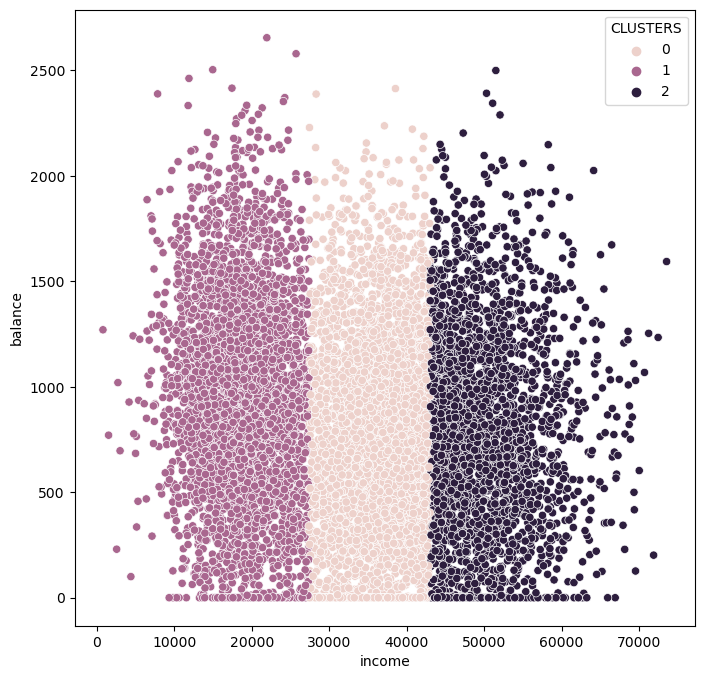

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

sns.scatterplot(x = df.income,
               y = df.balance,
               hue=df.CLUSTERS,data=df)

Now applying the Logistic regression algorithum to predict the defaulters

In [63]:
x = df.drop(['default','CLUSTERS'],axis=1)

In [64]:
y = df.default

Transforming the data with Label Encoder as the values for variable x is in classified values

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
x.student = le.fit_transform(x.student)

In [68]:
y = pd.Series(le.fit_transform(y))

In [69]:
x

,student,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700
2,0,1073.549164,31767.138947
3,0,529.250605,35704.493935
4,0,785.655883,38463.495879
...,...,...,...
9995,0,711.555020,52992.378914
9996,0,757.962918,19660.721768
9997,0,845.411989,58636.156984
9998,0,1569.009053,36669.112365


In [70]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr = LogisticRegression()

In [75]:
lr.fit(x_train,y_train)

LogisticRegression()

In [76]:
y_pred = lr.predict(x_test)

Checking Accuracy of the data with Accuracy_score

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_pred,y_test).round(2)

0.97